In [19]:
from __future__ import print_function

import time
import numpy as np
from PIL import Image as pil_image
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.layers.convolutional import *
from keras import regularizers
from keras.optimizers import Adam

https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm

In [7]:
# With out zero padding
model = Sequential([
    Dense(16, activation='relu', input_shape=(20,20,3)),
    Conv2D(32,kernel_size=(3,3),activation='relu',padding='valid'),
    Conv2D(64,kernel_size=(5,5),activation='relu',padding='valid'),
    Conv2D(128,kernel_size=(7,7),activation='relu',padding='valid'),
    Flatten(),#A flatten operation on a tensor reshapes the tensor 
    #to have the shape that is equal to the number of elements 
    #contained in tensor non including the batch dimension.
    Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20, 20, 16)        64        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 32)        4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         401536    
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 16386     
Total params: 473,890
Trainable params: 473,890
Non-trainable params: 0
________________________________________________

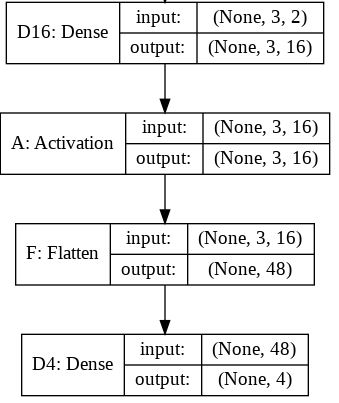

In [8]:
# Zero padding activated
model = Sequential([
    Dense(16, activation='relu', input_shape=(20,20,3)),
    Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
    Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'),
    Conv2D(128,kernel_size=(7,7),activation='relu',padding='same'),
    Flatten(),
    Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20, 20, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 128)       401536    
_________________________________________________________________
flatten_4 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102402    
Total params: 559,906
Trainable params: 559,906
Non-trainable params: 0
________________________________________________

In [10]:
# MaxPooling
model = Sequential([
    Dense(16, activation='relu', input_shape=(20,20,3)),
    Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'),
    Flatten(),
    Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20, 20, 16)        64        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 20, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 12802     
Total params: 68,770
Trainable params: 68,770
Non-trainable params: 0
__________________________________________________

In [11]:
# Initializing kernel
model = Sequential([
    Dense(16, activation='relu', input_shape=(20,20,3)),
    Dense(32, activation='relu', kernel_initializer='glorot_uniform'),
    Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20, 20, 16)        64        
_________________________________________________________________
dense_12 (Dense)             (None, 20, 20, 32)        544       
_________________________________________________________________
dense_13 (Dense)             (None, 20, 20, 2)         66        
Total params: 674
Trainable params: 674
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Including penalization
model = Sequential([
    Dense(16, activation='relu', input_shape=(20,20,3)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(2, activation='softmax'),
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 20, 20, 16)        64        
_________________________________________________________________
dense_15 (Dense)             (None, 20, 20, 32)        544       
_________________________________________________________________
dense_16 (Dense)             (None, 20, 20, 2)         66        
Total params: 674
Trainable params: 674
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Initializing kernel
model = Sequential([
    Dense(16, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu', kernel_initializer='glorot_uniform'),
    Dense(2, activation='softmax'),
])
model.summary()

%run "Preprocessing data for keras.ipynb" #creating data
#Compile model
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Modifiying batches
#Once created the model we can use fit

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_18 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(scaled_train_samples, train_labels,validation_split=.20,batch_size=10 ,epochs=20 , shuffle=True, verbose=2)

Train on 1680 samples, validate on 420 samples
Epoch 1/20
 - 2s - loss: 0.6731 - accuracy: 0.5857 - val_loss: 0.6762 - val_accuracy: 0.5690
Epoch 2/20
 - 1s - loss: 0.6417 - accuracy: 0.6625 - val_loss: 0.6629 - val_accuracy: 0.6071
Epoch 3/20
 - 1s - loss: 0.6105 - accuracy: 0.7274 - val_loss: 0.6512 - val_accuracy: 0.6167
Epoch 4/20
 - 0s - loss: 0.5790 - accuracy: 0.7554 - val_loss: 0.6391 - val_accuracy: 0.6310
Epoch 5/20
 - 0s - loss: 0.5436 - accuracy: 0.7976 - val_loss: 0.6276 - val_accuracy: 0.6690
Epoch 6/20
 - 0s - loss: 0.5086 - accuracy: 0.8268 - val_loss: 0.6179 - val_accuracy: 0.6810
Epoch 7/20
 - 0s - loss: 0.4753 - accuracy: 0.8494 - val_loss: 0.6095 - val_accuracy: 0.6929
Epoch 8/20
 - 1s - loss: 0.4424 - accuracy: 0.8726 - val_loss: 0.6049 - val_accuracy: 0.7048
Epoch 9/20
 - 1s - loss: 0.4103 - accuracy: 0.8821 - val_loss: 0.6007 - val_accuracy: 0.7095
Epoch 10/20
 - 0s - loss: 0.3801 - accuracy: 0.8988 - val_loss: 0.5999 - val_accuracy: 0.7238
Epoch 11/20
 - 0s - lo